In [1]:
import pandas as pd
import numpy as np

#importing data

In [2]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data',header=None,na_values='?')

In [3]:
data.columns=['symboling','normalized-losses','make','fuel-type','aspiration',
              'num-of-doors','body-style','drive-wheels','engine-location',
              'wheel-base','length','width','height','curb-weight','engine-type',
              'num-of-cylinders','engine-size','fuel-system','bore','stroke',
              'compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']


In [4]:
data.head().T

,0,1,2,3,4
symboling,3,3,1,2,2
normalized-losses,NaN,NaN,NaN,164,164
make,alfa-romero,alfa-romero,alfa-romero,audi,audi
fuel-type,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
num-of-doors,two,two,two,four,four
body-style,convertible,convertible,hatchback,sedan,sedan
drive-wheels,rwd,rwd,rwd,fwd,4wd
engine-location,front,front,front,front,front
wheel-base,88.6,88.6,94.5,99.8,99.4


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
data.shape

(205, 26)

In [7]:
data.isnull().sum()
#data.info()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

#data cleaning

In [8]:
#deleteing null price values
data = data[~data.price.isnull()]

In [9]:
#check
data.price.isnull().sum()

0

In [10]:
categorical_columns = data.select_dtypes(include = 'object').columns
from collections import Counter
for col in categorical_columns:
  print(col+"->",Counter(data[col]))

make-> Counter({'toyota': 32, 'nissan': 18, 'mazda': 17, 'honda': 13, 'mitsubishi': 13, 'subaru': 12, 'volkswagen': 12, 'peugot': 11, 'volvo': 11, 'dodge': 9, 'bmw': 8, 'mercedes-benz': 8, 'plymouth': 7, 'audi': 6, 'saab': 6, 'porsche': 4, 'alfa-romero': 3, 'chevrolet': 3, 'jaguar': 3, 'isuzu': 2, 'renault': 2, 'mercury': 1})
fuel-type-> Counter({'gas': 181, 'diesel': 20})
aspiration-> Counter({'std': 165, 'turbo': 36})
num-of-doors-> Counter({'four': 113, 'two': 86, nan: 2})
body-style-> Counter({'sedan': 94, 'hatchback': 68, 'wagon': 25, 'hardtop': 8, 'convertible': 6})
drive-wheels-> Counter({'fwd': 118, 'rwd': 75, '4wd': 8})
engine-location-> Counter({'front': 198, 'rear': 3})
engine-type-> Counter({'ohc': 145, 'ohcf': 15, 'ohcv': 13, 'dohc': 12, 'l': 12, 'rotor': 4})
num-of-cylinders-> Counter({'four': 157, 'six': 24, 'five': 10, 'two': 4, 'eight': 4, 'three': 1, 'twelve': 1})
fuel-system-> Counter({'mpfi': 92, '2bbl': 64, 'idi': 20, '1bbl': 11, 'spdi': 9, '4bbl': 3, 'mfi': 1, 'sp

In [11]:
data = data.dropna(subset=['num-of-doors','fuel-type'])
data[categorical_columns].isnull().sum()

make                0
fuel-type           0
aspiration          0
num-of-doors        0
body-style          0
drive-wheels        0
engine-location     0
engine-type         0
num-of-cylinders    0
fuel-system         0
dtype: int64

In [12]:
numerical_columns = data.select_dtypes(np.number).columns
numerical_columns

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [13]:
null_value_per_numrecial_columns =data[numerical_columns].isnull().sum()

In [14]:
null_numrecial_columns=list(null_value_per_numrecial_columns[null_value_per_numrecial_columns>0].index)

In [15]:
for col in null_numrecial_columns:
  median = data[col].median()
  nulls = data[col].isnull()
  data.loc[nulls,col]=median

In [16]:
data[numerical_columns].isnull().sum()

symboling            0
normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [17]:
data['num-of-doors']=data['num-of-doors'].map({'four':4,'two':2})
data['num-of-cylinders']=data['num-of-cylinders'].map({'four': 4, 'six': 6, 'five': 5, 'two': 2, 'eight': 8, 'three': 3, 'twelve': 12})
data['volume']=data['length']*data['width']*data['height']
#data = data.drop(labels=['length','width','height'],axis = 1)

In [18]:
categorical_columns = data.select_dtypes(include = 'object').columns
numerical_columns=data.select_dtypes(include=np.number).columns

In [19]:
data.head().T

,0,1,2,3,4
symboling,3,3,1,2,2
normalized-losses,115,115,115,164,164
make,alfa-romero,alfa-romero,alfa-romero,audi,audi
fuel-type,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
num-of-doors,2,2,2,4,4
body-style,convertible,convertible,hatchback,sedan,sedan
drive-wheels,rwd,rwd,rwd,fwd,4wd
engine-location,front,front,front,front,front
wheel-base,88.6,88.6,94.5,99.8,99.4


#EDA

checking target variable distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'count'), Text(0.5, 0, 'log(price)')]

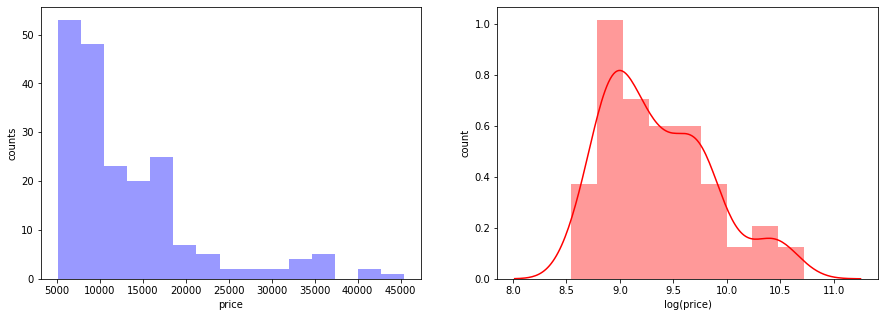

In [20]:
f, axes = plt.subplots(1, 2, figsize=(15, 5))
#sns.set(style='whitegrid',palette='deep',font_scale=1.1,rc={'figure.figsize':[10,10]})
sns.distplot((data['price']), kde=False, color="b",bins=15, ax=axes[0]).set(xlabel='price',ylabel='counts')
sns.distplot(np.log(data['price']), kde=True, color="r", ax=axes[1]).set(xlabel = 'log(price)',ylabel = 'count')
#plt.show()




its better to work with log value as the distribution is better. Metric will be RMLSE

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd6474c9410>,
      dtype=object)

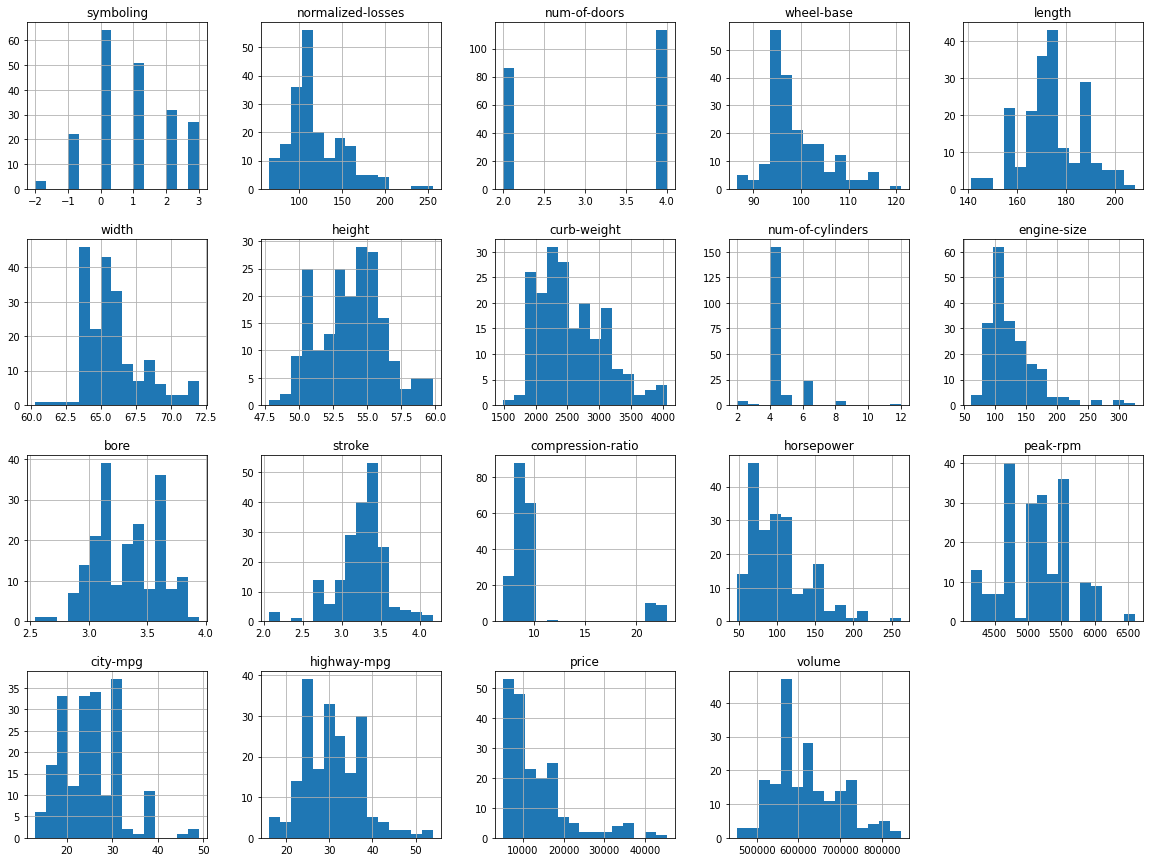

In [21]:
data[numerical_columns].hist(bins=15,figsize =(20,15),layout=(4,5))

In [22]:
data[data['drive-wheels']=='4wd'].groupby('body-style')['drive-wheels'].count()

body-style
hatchback    1
sedan        3
wagon        4
Name: drive-wheels, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

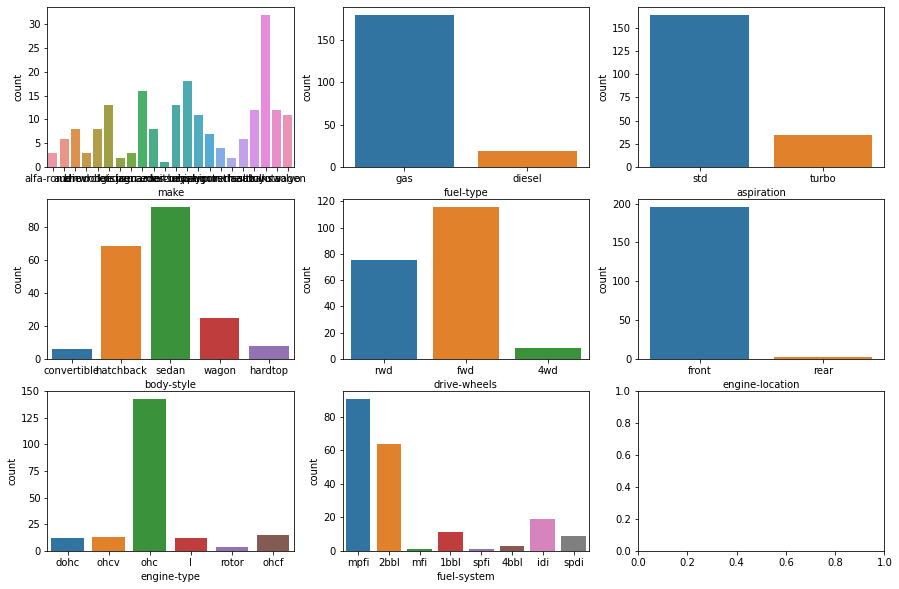

In [23]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for variable, subplot in zip(categorical_columns, ax.flatten()):
    sns.countplot(data[variable], ax=subplot)

relation between two numerical column

<Figure size 720x360 with 0 Axes>

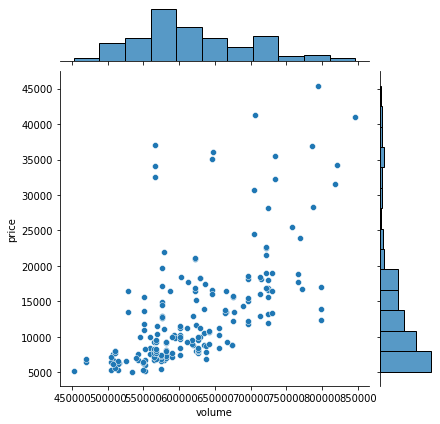

<Figure size 720x360 with 0 Axes>

In [25]:
sns.jointplot(y=data.price,x=data['volume'])#scatterplot
plt.figure(figsize=(10,5))

relation between price and categorial column

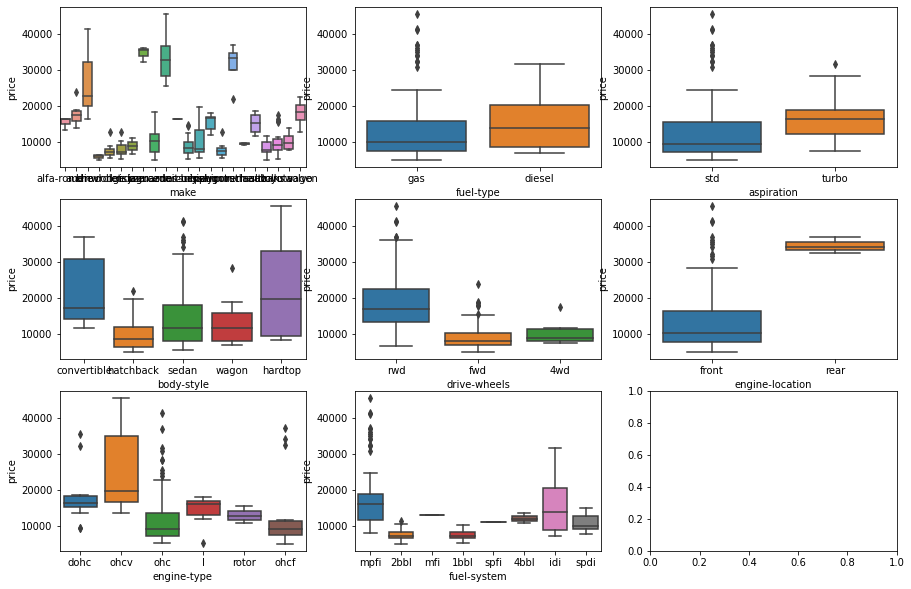

In [26]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for var, subplot in zip(categorical_columns, ax.flatten()):
    sns.boxplot(x=var, y='price', data=data, ax=subplot)

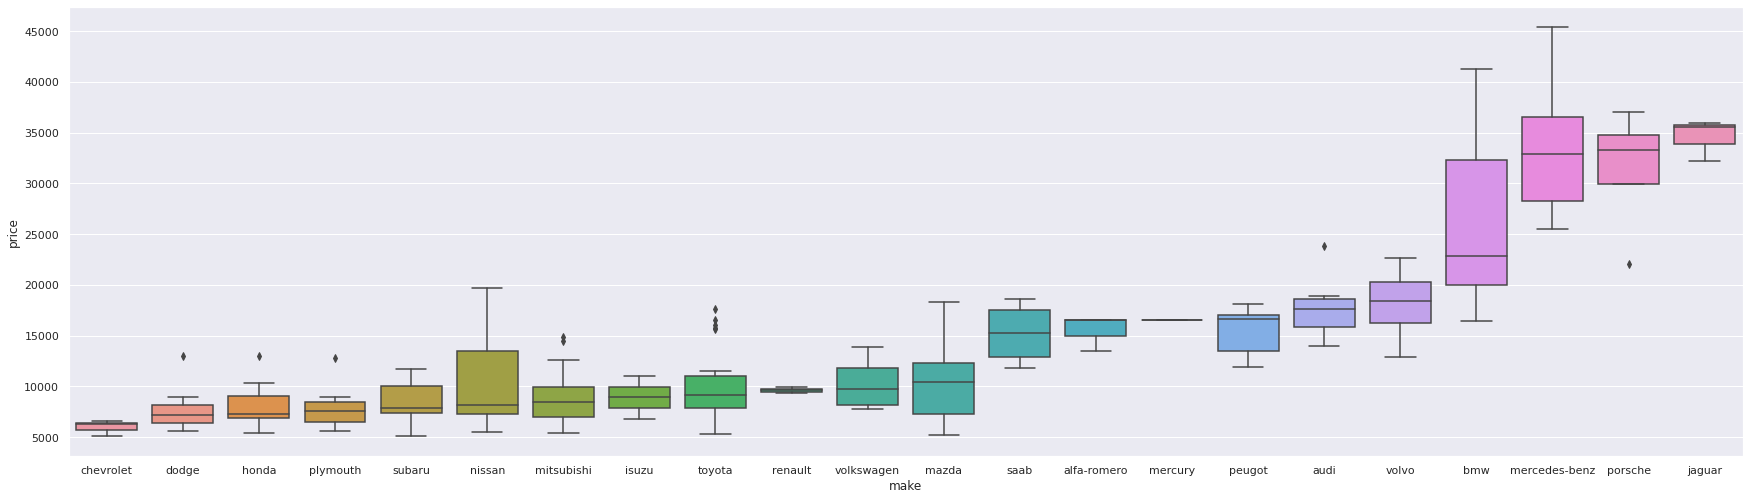

In [51]:
sorted_make = data.groupby(['make'])['price'].median().sort_values()
sns.boxplot(x=data['make'], y=data['price'],order=list(sorted_make.index))
sns.set(rc={'figure.figsize':(30,8.27)})
#plt.figure(figsize=(30,5))

conditional plot

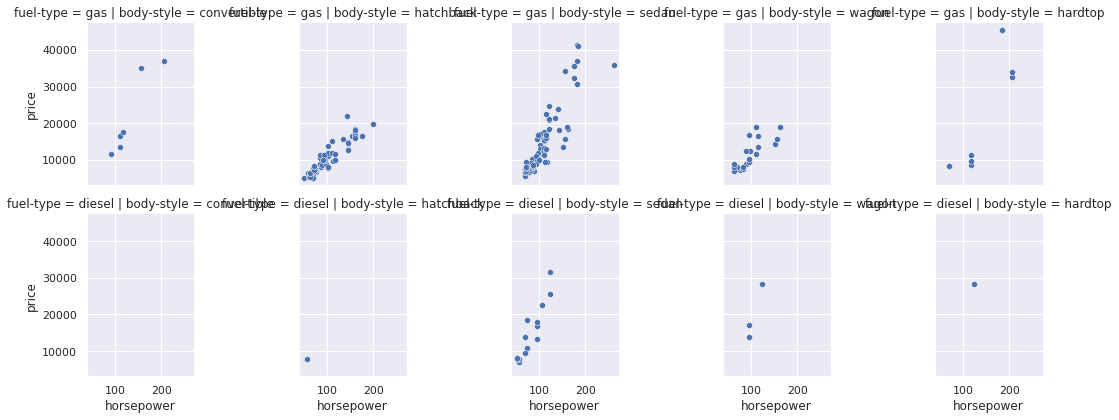

In [28]:
cond_plot = sns.FacetGrid(data=data,col='body-style',row='fuel-type')
cond_plot.map(sns.scatterplot,'horsepower','price')


#feature selection

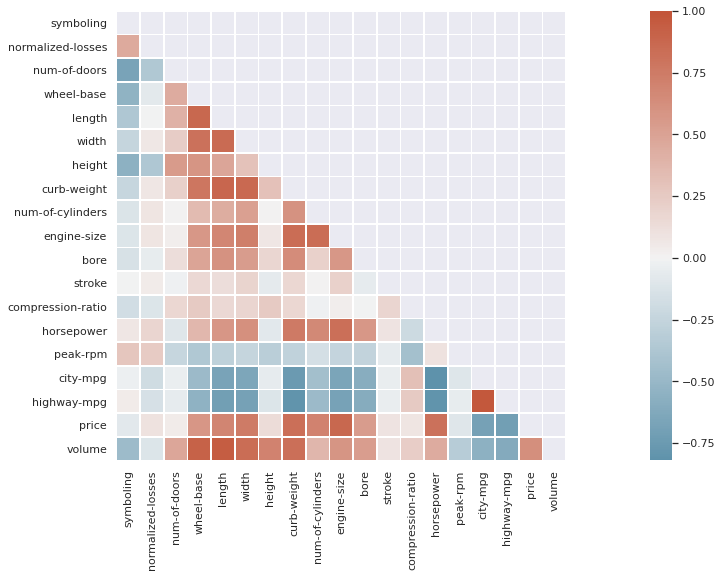

In [72]:
corr = data[numerical_columns].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
#sns.heatmap(corr)
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5)


In [29]:
new_data = data.drop(columns=['length','width','height'])

#Prepare data for training

In [97]:
y=np.log(data['price'])
X=new_data.drop(columns='price')

numerical scaling

In [98]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
num_col = X.select_dtypes(include=np.number).columns
X[num_col]=scalar.fit_transform(X[num_col])

In [ ]:
X[num_col]

one hot encoding

In [99]:
cat_col=X.select_dtypes(include='object').columns
from sklearn.preprocessing import OneHotEncoder
oe = OneHotEncoder()
X_cat=pd.get_dummies(X,columns=cat_col)

In [103]:
X=pd.concat([X[num_col],X_cat],axis=1)

In [107]:
X.columns

Index(['symboling', 'normalized-losses', 'num-of-doors', 'wheel-base',
       'curb-weight', 'num-of-cylinders', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'volume', 'symboling', 'normalized-losses',
       'num-of-doors', 'wheel-base', 'curb-weight', 'num-of-cylinders',
       'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'volume', 'make_alfa-romero',
       'make_audi', 'make_bmw', 'make_chevrolet', 'make_dodge', 'make_honda',
       'make_isuzu', 'make_jaguar', 'make_mazda', 'make_mercedes-benz',
       'make_mercury', 'make_mitsubishi', 'make_nissan', 'make_peugot',
       'make_plymouth', 'make_porsche', 'make_renault', 'make_saab',
       'make_subaru', 'make_toyota', 'make_volkswagen', 'make_volvo',
       'fuel-type_diesel', 'fuel-type_gas', 'aspiration_std',
       'aspiration_turbo', 'body-style_convertible', 'body-style_hardtop',
 

In [108]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .20, random_state=1)
#train_set = train_set.reset_index(drop = 1)
#test_set = test_set.reset_index(drop = 1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


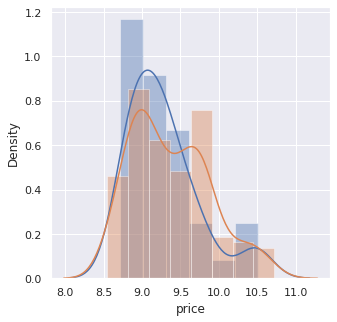

In [109]:
sns.distplot((y_test))
sns.set(rc={'figure.figsize':(5,5)})
sns.distplot((y_train))

#

In [111]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error

#Train and Evaluate

In [112]:
def rmse(y_true,y_pred):
  return np.sqrt(mean_squared_error(y_true,y_pred))

In [113]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [118]:
list(zip(X_train.columns, lr.coef_))

[('symboling', -0.011249133327318295),
 ('normalized-losses', 0.007577039798316783),
 ('num-of-doors', 0.006752545932519061),
 ('wheel-base', 0.07466076870324484),
 ('curb-weight', 0.12412531082596906),
 ('num-of-cylinders', 0.006391590685694573),
 ('engine-size', 0.0679198899653223),
 ('bore', -0.011933095443169357),
 ('stroke', -0.010586538171161475),
 ('compression-ratio', -0.0552489606087471),
 ('horsepower', 0.0009410341353295604),
 ('peak-rpm', 0.014767525378082777),
 ('city-mpg', -0.07009195225727032),
 ('highway-mpg', 0.05379414269693125),
 ('volume', -0.07270549355049005),
 ('symboling', -0.011249133327318792),
 ('normalized-losses', 0.007577039798316171),
 ('num-of-doors', 0.006752545932517895),
 ('wheel-base', 0.07466076870324401),
 ('curb-weight', 0.12412531082596917),
 ('num-of-cylinders', 0.0063915906856936155),
 ('engine-size', 0.06791988996532233),
 ('bore', -0.011933095443167424),
 ('stroke', -0.010586538171163257),
 ('compression-ratio', -0.055248960608746595),
 ('hor

In [115]:
y_pred = lr.predict(X_test)
rmse(y_test,y_pred) 

0.13321047559283203

In [116]:
ls = Lasso(alpha=0.001,random_state=1)
ls.fit(X_train,y_train)
y_pred = ls.predict(X_test)
rmse(y_test,y_pred)

0.13043444935725848

In [119]:
list(zip(X_train.columns, ls.coef_))
lr.

[('symboling', 0.009527592608435645),
 ('normalized-losses', -0.0),
 ('num-of-doors', 0.0),
 ('wheel-base', 0.06450521086268801),
 ('curb-weight', 0.18710617313652245),
 ('num-of-cylinders', -0.0),
 ('engine-size', 0.05558323213295198),
 ('bore', -0.0),
 ('stroke', -0.0),
 ('compression-ratio', 0.0465512740420675),
 ('horsepower', 0.0969751842942996),
 ('peak-rpm', 0.0),
 ('city-mpg', -0.06512745681729536),
 ('highway-mpg', 0.03267595455479348),
 ('volume', 0.0),
 ('symboling', 0.0),
 ('normalized-losses', -0.0),
 ('num-of-doors', 0.008230529385448663),
 ('wheel-base', 0.009869188504273782),
 ('curb-weight', 0.0004808956611265944),
 ('num-of-cylinders', -0.020821642949170115),
 ('engine-size', 0.0),
 ('bore', -0.022204514991850024),
 ('stroke', -0.020830470079932228),
 ('compression-ratio', 0.006177345227023883),
 ('horsepower', 0.0),
 ('peak-rpm', 0.011036500757124713),
 ('city-mpg', -0.04328456444511308),
 ('highway-mpg', 0.021694760822027283),
 ('volume', 0.0),
 ('make_alfa-romero',

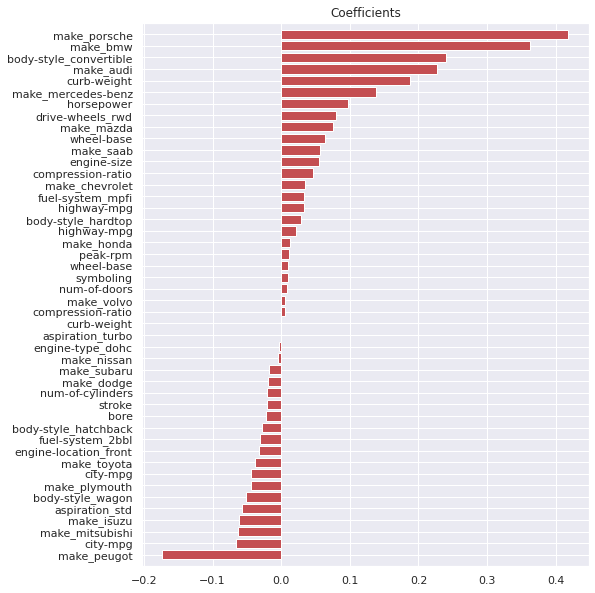

In [121]:

features = np.array(list(X_train.columns))
coef = ls.coef_
features = features[coef != 0.0]
coef = coef[coef != 0]
coef_idx = np.argsort(coef)

plt.figure(figsize=(8, 10))
plt.title("Coefficients")
coef_num = range(len(coef))
plt.barh(coef_num, coef[coef_idx], color="r", align="center")

plt.yticks(coef_num, features[coef_idx])
plt.ylim([-1, len(features)])

plt.show()